<h1>PHÂN TÍCH BIẾN ĐỘNG GIÁ CỔ PHIẾU TẬP ĐOÀN FPT</h1>

<h2>1.Nhìn nhận và đánh giá thông tin</h2>
<p> Từ database mà nhà tuyển dụng cho thì dựa vào trực quan thì databasenày có các thành phần sau:</p>
<p>       _Ticker: Nhãn tên để phân biệt mã cổ phiếu với các công ty hoặc tập đoàn khác </p>
<p>       _Date/Time: Thời điểm ghi nhận dữ liệu, thường là ngày và giờ. Định dạng có vẻ như "MM/DD/YYYY H:mm". </p>
<p>       _Open:  Giá mở của cổ phiếu tại thời điểm cụ thể.</p>
<p>	      _High: Giá cao nhất (đỉnh) của cổ phiếu trong khoảng thời gian đó.</p>
<p>	      _Low: Giá thấp nhất (đáy) của cổ phiếu trong khoảng thời gian đó.</p>
<p>	      _Close:  Giá đóng cửa của cổ phiếu tại thời điểm cụ thể.</p>
<p>	      _Volume: Khối lượng giao dịch, tức là số lượng cổ phiếu đã được giao dịch trong khoảng thời gian đó. </p>
<p>	      _Open Interest: Số lượng cổ phiếu mà nhà đầu tư đang giữ trong tài khoản và chưa được bán hoặc mua lại.</p>

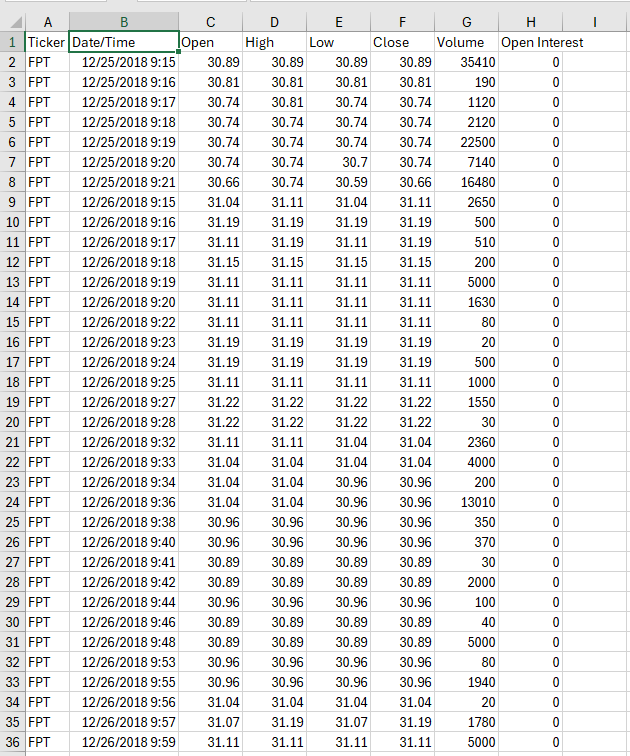

<h2> 2.Bắt đầu phân tích trên Jupyter notebook </h2>
<h3> 2.1 Sử dụng các hàm phân tích trên Jupyter notebook </h3>
<p> Các hàm dự kiến sẽ sử dụng trong bài phân tích này là: </p>
<p>     + Pandas
<p>     + Numpy</p>
<p>     + Matplotlib </p>
<p>     + sklearn </p>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics


#### 2.2 Đọc dữ liệu từ file csv và  Hiển thị một số dòng đầu tiên của dataframe

In [82]:
# Đọc dữ liệu từ file csv
FPT_data = pd.read_csv('FPT.csv')
# Hiển thị một số dòng đầu tiên của dataframe
print(FPT_data.head())

  Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0



#### 2.3 Xử lý dữ liệu
ở đây chúng ta thấy cột Date/Time chưa đúng định dạng datetime vậy nên chúng ta sẽ cần phải định dạng lại kiểu dữ liệu cho cột Date/Time về đúng định dạng


In [83]:
# Chuyển cột 'Date/Time' sang định dạng datetime
FPT_data['Date/Time'] = pd.to_datetime(FPT_data['Date/Time'])
# Hiển thị một số dòng đầu tiên của dataframe
print(FPT_data.head())

  Ticker           Date/Time   Open   High    Low  Close  Volume  \
0    FPT 2018-12-25 09:15:00  30.89  30.89  30.89  30.89   35410   
1    FPT 2018-12-25 09:16:00  30.81  30.81  30.81  30.81     190   
2    FPT 2018-12-25 09:17:00  30.74  30.81  30.74  30.74    1120   
3    FPT 2018-12-25 09:18:00  30.74  30.74  30.74  30.74    2120   
4    FPT 2018-12-25 09:19:00  30.74  30.74  30.74  30.74   22500   

   Open Interest  
0              0  
1              0  
2              0  
3              0  
4              0  


##### Sắp xếp lại các cột ưu tiên dataframe, để dễ dàng quan sát và phân tích 
Ở đây ta thấy cột index và Ticker không có giá trị vì chỉ mang tính chất đánh dấu nhưng vì ticker là để phân biệt với các mã cổ phiếu khác nên ta sẽ để cột Date/Time làm Index

In [84]:
# Đặt cột 'Date/Time' làm index
FPT_data.set_index('Date/Time', inplace=True)

In [85]:
# Hiển thị một số dòng đầu tiên của dataframe
print(FPT_data.head())

                    Ticker   Open   High    Low  Close  Volume  Open Interest
Date/Time                                                                    
2018-12-25 09:15:00    FPT  30.89  30.89  30.89  30.89   35410              0
2018-12-25 09:16:00    FPT  30.81  30.81  30.81  30.81     190              0
2018-12-25 09:17:00    FPT  30.74  30.81  30.74  30.74    1120              0
2018-12-25 09:18:00    FPT  30.74  30.74  30.74  30.74    2120              0
2018-12-25 09:19:00    FPT  30.74  30.74  30.74  30.74   22500              0


#### 2.4 Quan sát data dựa trên biểu đồ 
* Từ data có sẵn ta có thể vẽ một biểu đồ đường 
  * Biểu đồ đường giúp ta có thể theo dõi được biến động của cổ phiếu trong thời gian dài với biên độ thời gian nhỏ
  * Biểu đồ sẽ có 2 cột :
    * 1 cột là thời gian
    * 1 cột là giá cổ phiếu
  


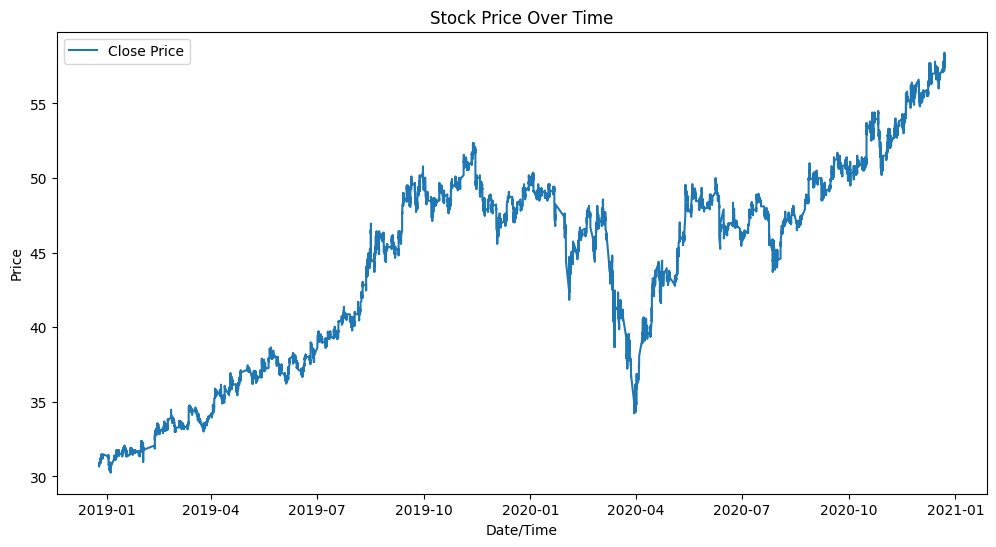

In [86]:
# Vẽ biểu đồ giá cổ phiếu theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(FPT_data['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Dưới đây là một số điểm chính của biểu đồ:

* Xu hướng tăng: Biểu đồ cho thấy cổ phiếu có xu hướng tăng giá liên tục từ khoảng 30 lên đến 55. Điều này có thể cho thấy cổ phiếu có nhu cầu cao và tiềm năng tăng trưởng.
Biến động cao: Biểu đồ cũng cho thấy cổ phiếu có biến động cao trong khoảng thời gian từ 20000 đến 60000. Điều này có thể cho thấy cổ phiếu có rủi ro cao và ảnh hưởng bởi nhiều yếu tố bên ngoài.
* Đỉnh và đáy: Biểu đồ cũng cho thấy các điểm đỉnh và đáy của cổ phiếu. Đỉnh là điểm cao nhất mà cổ phiếu đạt được trong một khoảng thời gian, còn đáy là điểm thấp nhất. Bạn có thể sử dụng các điểm này để xác định mức giá mua và bán hợp lý của cổ phiếu.
* Kháng cự và hỗ trợ: Biểu đồ cũng cho thấy các mức kháng cự và hỗ trợ của cổ phiếu. Kháng cự là mức giá mà cổ phiếu gặp khó khăn trong việc vượt qua, còn hỗ trợ là mức giá mà cổ phiếu gặp khó khăn trong việc giảm xuống. Bạn có thể sử dụng các mức này để xác định mức giá mục tiêu và dừng lỗ của cổ phiếu.

##### Từ đánh giá bên trên và yêu cầu đề bài đặt ra là tính sự biến động của giá cổ phiếu thì ta có một biểu thức sau:
#### <B> Biến động giá cổ phiếu = Giá cổ phiếu N (phút hoặc giờ hoặc ngày) sau - Giả cổ phiếu hiện tại</B>

Từ công thức trên nên ta sẽ tính và tạo thêm 1 cột giá biến động

In [87]:

# Tính toán biến động giá cổ phiếu
FPT_data['Price Change'] = FPT_data['Close'].shift(-1) - FPT_data['Close']
# Hiển thị một số dòng đầu tiên của dataframe
print(FPT_data.head())


                    Ticker   Open   High    Low  Close  Volume  Open Interest  \
Date/Time                                                                       
2018-12-25 09:15:00    FPT  30.89  30.89  30.89  30.89   35410              0   
2018-12-25 09:16:00    FPT  30.81  30.81  30.81  30.81     190              0   
2018-12-25 09:17:00    FPT  30.74  30.81  30.74  30.74    1120              0   
2018-12-25 09:18:00    FPT  30.74  30.74  30.74  30.74    2120              0   
2018-12-25 09:19:00    FPT  30.74  30.74  30.74  30.74   22500              0   

                     Price Change  
Date/Time                          
2018-12-25 09:15:00         -0.08  
2018-12-25 09:16:00         -0.07  
2018-12-25 09:17:00          0.00  
2018-12-25 09:18:00          0.00  
2018-12-25 09:19:00          0.00  


In [88]:
# Loại bỏ dòng cuối cùng vì không có giá trị biến động giá cổ phiếu
stock_data = FPT_data[:-1]
# Hiển thị một số dòng đầu tiên của dataframe
print(FPT_data.head())

                    Ticker   Open   High    Low  Close  Volume  Open Interest  \
Date/Time                                                                       
2018-12-25 09:15:00    FPT  30.89  30.89  30.89  30.89   35410              0   
2018-12-25 09:16:00    FPT  30.81  30.81  30.81  30.81     190              0   
2018-12-25 09:17:00    FPT  30.74  30.81  30.74  30.74    1120              0   
2018-12-25 09:18:00    FPT  30.74  30.74  30.74  30.74    2120              0   
2018-12-25 09:19:00    FPT  30.74  30.74  30.74  30.74   22500              0   

                     Price Change  
Date/Time                          
2018-12-25 09:15:00         -0.08  
2018-12-25 09:16:00         -0.07  
2018-12-25 09:17:00          0.00  
2018-12-25 09:18:00          0.00  
2018-12-25 09:19:00          0.00  


#### Chọn đặc trưng quan trọng:
Chọn các đặc trưng bạn muốn sử dụng trong mô hình. Trong ví dụ này, 'Close' và 'Volume' được chọn làm đặc trưng.

In [89]:
features = ['Close', 'Volume'] 

#### Chia dữ liệu thành tập huấn luyện và tập kiểm tra
Bước này chia dữ liệu thành đặc trưng (X) và biến mục tiêu (y). Sau đó, nó tiếp tục chia dữ liệu thành tập huấn luyện và tập kiểm tra sử dụng train_test_split.

In [90]:
# In danh sách các cột trong DataFrame
print(FPT_data.columns)

# Kiểm tra xem cột 'Price Change' có trong DataFrame hay không
if 'Price Change' not in FPT_data.columns:
    print("Cột 'Price Change' không tồn tại trong DataFrame.")
else:
    # Nếu cột tồn tại, tiếp tục với xử lý dữ liệu
    X = FPT_data[features]  # Đảm bảo features đã được định nghĩa trước
    y = FPT_data['Price Change']
    # Tiếp tục với các bước tiếp theo của bạn


Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest',
       'Price Change'],
      dtype='object')


In [91]:
X = FPT_data[features]
y = FPT_data['Price Change']
# Chia dữ liệu thành features (đặc trưng) và target (biến động giá cổ phiếu)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Xây dựng mô hình hồi quy tuyến tính và Huấn luyện mô hình
Ở đây, tạo một mô hình hồi quy tuyến tính và huấn luyện mô hình trên tập huấn luyện.

In [92]:
# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### Dự đoán trên tập kiểm tra và Đánh giá mô hình:
Cuối cùng tính toán và in ra ba độ đo đánh giá mô hình trên tập kiểm tra: Mean Absolute Error (MAE), Mean Squared Error (MSE), và Root Mean Squared Error (RMSE). Các độ đo này giúp đánh giá hiệu suất của mô hình trong việc dự đoán biến động giá cổ phiếu.

In [1]:

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))# Sai số trung bình tuyệt đối
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))# sai số toàn phương trung bình
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))#mức độ phân tán các giá trị dự đoán



NameError: name 'model' is not defined

Kết quả đánh giá mô hình của bạn bằng các độ đo Mean Absolute Error (MAE), Mean Squared Error (MSE), và Root Mean Squared Error (RMSE) đã được tính và hiển thị như sau:

1. **Mean Absolute Error (MAE):**
   - Giá trị MAE là 0.03545422270712412. MAE đo trung bình giá trị tuyệt đối của sự chênh lệch giữa giá trị dự đoán và giá trị thực tế. Giá trị càng thấp cho thấy mô hình của bạn có độ chính xác cao về mặt tuyến tính.

2. **Mean Squared Error (MSE):**
   - Giá trị MSE là 0.003388616763609332. MSE đo trung bình giá trị bình phương của sự chênh lệch giữa giá trị dự đoán và giá trị thực tế. MSE thường trung bình cao hơn so với MAE vì nó có xu hướng đặt trọng số cao hơn cho các sai số lớn.

3. **Root Mean Squared Error (RMSE):**
   - Giá trị RMSE là 0.05821182666442733. RMSE là căn bậc hai của MSE, nó đo trung bình giá trị tuyệt đối của sự chênh lệch giữa giá trị dự đoán và giá trị thực tế, nhưng mang theo một yếu tố trọng số để giảm ảnh hưởng của các sai số lớn. RMSE càng thấp thì mô hình càng chính xác.

**Giải thích:**
- Các giá trị MAE, MSE, và RMSE đều khá thấp, cho thấy mô hình của bạn có hiệu suất tốt trong việc dự đoán biến động giá cổ phiếu. Các giá trị này càng gần 0, thì mô hình càng gần dự đoán giá trị thực tế.
- Tuy nhiên, để đánh giá mô hình một cách toàn diện hơn, bạn cũng nên xem xét các yếu tố khác như phân phối của sai số, đồ thị so sánh giữa giá trị thực tế và giá trị dự đoán, cũng như xem xét các biến động thời gian của sai số để hiểu rõ hơn về hiệu suất của mô hình.


#### Đánh giá mô hình:
* từ những số liệu phân tích trên ta thấy sự chênh lệch không quá lớn nên mức độ khả quan khá cao
* để có thể hiểu trực quan hơn về số liệu đã phân tích thì bây giờ chúng ta sẽ sử dụng biểu đồ để đưa ra đánh giá

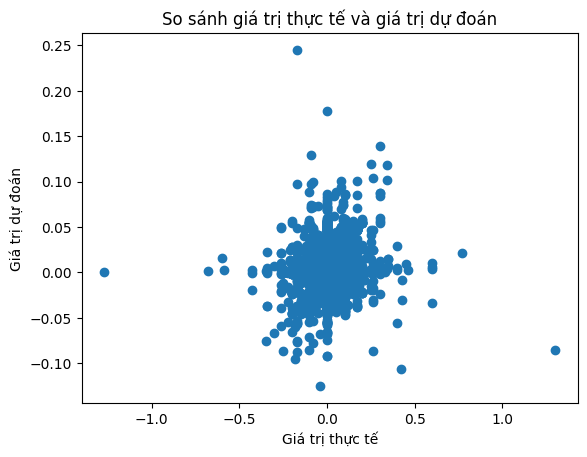

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.show()

Giải thích biểu đồ về sự so sánh giữa giá trị thực tế và giá trị dự đoán, đúng không? Đây là một biểu đồ phân tán, thể hiện mối tương quan giữa hai bộ dữ liệu này. Càng gần với một đường thẳng, càng cho thấy mô hình dự đoán càng ước lượng chính xác giá trị thực tế.

Dưới đây là một số điểm chính của biểu đồ:

- **Mối tương quan cao:** Biểu đồ cho thấy có nhiều điểm dữ liệu tập trung xung quanh điểm 0.0 trên cả hai trục, cho thấy nhiều dự đoán chính xác hoặc gần chính xác. Điều này có thể cho thấy mô hình dự đoán có độ tin cậy cao và phù hợp với dữ liệu thực tế.
- **Mối tương quan thấp:** Biểu đồ cũng cho thấy có nhiều điểm dữ liệu phân tán hơn khi xa điểm 0.0, cho thấy độ chính xác của dự đoán khác nhau cho những điểm này. Điều này có thể cho thấy mô hình dự đoán có độ tin cậy thấp và không phù hợp với dữ liệu thực tế.
- **Độ lệch:** Biểu đồ cũng cho thấy độ lệch giữa giá trị thực tế và giá trị dự đoán. Độ lệch là sự khác biệt giữa hai giá trị này. Càng nhỏ độ lệch, càng cho thấy dự đoán càng chính xác. 
